In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DataPreprocessing (1).csv')
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,43.0,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data['Income']=data['Income'].fillna(data['Income'].median())
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,73200.0,Yes
5,India,40.0,69600.0,Yes
6,Brazil,43.0,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             10 non-null     float64
 2   Income          10 non-null     float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,73200.0,Yes
5,India,40.0,69600.0,Yes
6,Brazil,43.0,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


Text(0.5, 1.0, 'Box plot of Age')

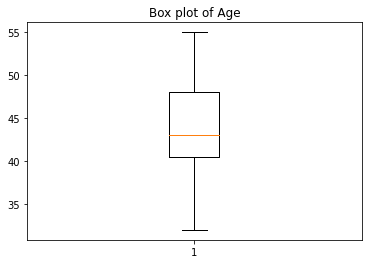

In [ ]:
# outliers in Age column
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of Income')

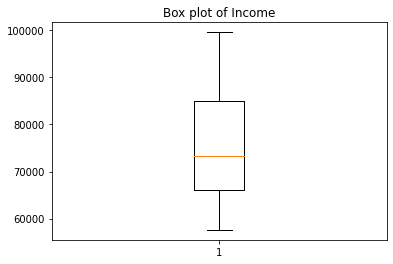

In [ ]:
plt.boxplot(data['Income'])
plt.title('Box plot of Income')

In [ ]:
data.Region.nunique()

3

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in data:
  if data[i].dtype==np.dtype('O'):
    data[i]=le.fit_transform(data[i])


In [ ]:
data

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,73200.0,1
5,1,40.0,69600.0,1
6,0,43.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


In [ ]:
# split the dataset and create the model
data.columns
y=data['Online Shopper']
x=data.drop('Online Shopper',axis=1)

In [ ]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
# create linear model
from sklearn import linear_model
lr=linear_model.LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [ ]:
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE is: ',mean_squared_error(y_test,prediction))

MSE is:  0.5


In [ ]:
# r^2 ed value
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,prediction))

R squared value is: -1.0


In [ ]:
# feature scaling
# standard scaling
# scaling is done on features
x.describe()

,Region,Age,Income
count,10.000000,10.000000,10.000000
mean,1.000000,43.700000,76200.000000
std,0.816497,7.257946,13916.896206
min,0.000000,32.000000,57600.000000
25%,0.250000,40.500000,66000.000000
50%,1.000000,43.000000,73200.000000
75%,1.750000,48.000000,84900.000000
max,2.000000,55.000000,99600.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)
x.describe()

,0,1,2
count,10.000000,1.000000e+01,1.000000e+01
mean,0.000000,-3.913536e-16,-3.330669e-17
std,1.054093,1.054093e+00,1.054093e+00
min,-1.290994,-1.699225e+00,-1.408800e+00
25%,-0.968246,-4.647453e-01,-7.725677e-01
50%,0.000000,-1.016630e-01,-2.272258e-01
75%,0.968246,6.245015e-01,6.589548e-01
max,1.290994,1.641132e+00,1.772361e+00


In [ ]:
data

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,73200.0,1
5,1,40.0,69600.0,1
6,0,43.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


In [ ]:
# again create logistic regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 1.0
R squared value is: -3.0


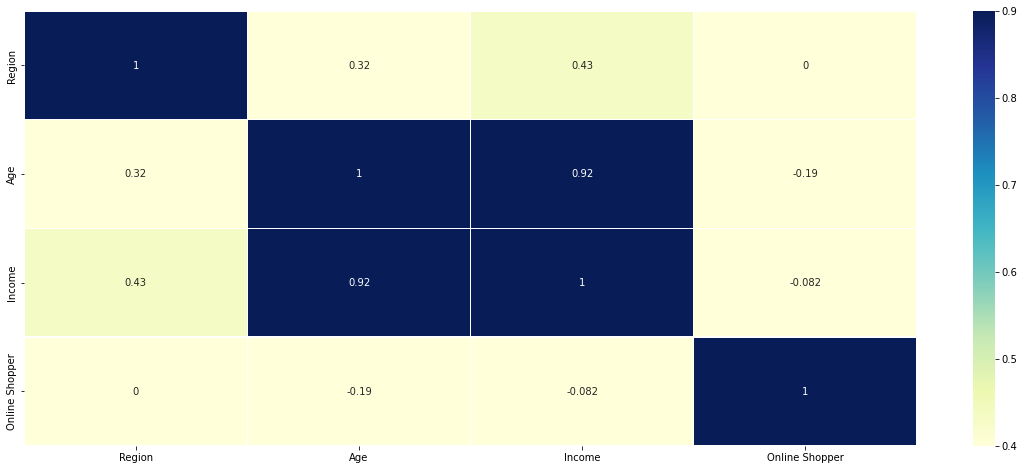

In [ ]:
# feature reduction
# and check the model is improving
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
# min-max scaling
# we change the feature set by standard scaler.again take x from the dataset
x=data.drop('Online Shopper',axis=1)
x.describe()

,Region,Age,Income
count,10.000000,10.000000,10.000000
mean,1.000000,43.700000,76200.000000
std,0.816497,7.257946,13916.896206
min,0.000000,32.000000,57600.000000
25%,0.250000,40.500000,66000.000000
50%,1.000000,43.000000,73200.000000
75%,1.750000,48.000000,84900.000000
max,2.000000,55.000000,99600.000000


In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
# apply this scaling to x
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2
count,10.000000,10.000000,10.000000
mean,0.500000,0.508696,0.442857
std,0.408248,0.315563,0.331355
min,0.000000,0.000000,0.000000
25%,0.125000,0.369565,0.200000
50%,0.500000,0.478261,0.371429
75%,0.875000,0.695652,0.650000
max,1.000000,1.000000,1.000000


In [ ]:
# again create linear regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared mean is:',r2_score(y_test,prediction))


MSE is: 1.0
R squared mean is: -3.0


In [ ]:
# normalization
# normalization is also done in the feature set.so again load the feature set
x=data.drop('Online Shopper',axis=1)
x.describe()


,Region,Age,Income
count,10.000000,10.000000,10.000000
mean,1.000000,43.700000,76200.000000
std,0.816497,7.257946,13916.896206
min,0.000000,32.000000,57600.000000
25%,0.250000,40.500000,66000.000000
50%,1.000000,43.000000,73200.000000
75%,1.750000,48.000000,84900.000000
max,2.000000,55.000000,99600.000000


In [ ]:
x=preprocessing.normalize(x)


In [ ]:
x=pd.DataFrame(x)
x.describe()

,0,1,2
count,10.000000,10.000000,1.000000e+01
mean,0.000013,0.000576,9.999998e-01
std,0.000011,0.000047,2.860790e-08
min,0.000000,0.000522,9.999998e-01
25%,0.000003,0.000553,9.999998e-01
50%,0.000012,0.000563,9.999998e-01
75%,0.000019,0.000584,9.999998e-01
max,0.000031,0.000689,9.999999e-01


In [ ]:
# again create linear regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE is: 0.5
R squared value is: -1.0


In [ ]:
data

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,73200.0,1
5,1,40.0,69600.0,1
6,0,43.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


In [ ]:
a=x_test.iloc[0]
print(a)
a=[[1,49,86400]]
model.predict(a)

0    0.000020
1    0.000552
2    1.000000
Name: 8, dtype: float64


array([0])